In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import linregress
import statsmodels.formula.api as smf        # for multiple regression
# empirical distribution has been installed in anaconda prompt for Pmf and Cdf

# Chapter 2 Distributions

## Probability mass function

In [2]:
gss= pd.read_hdf('gss.hdf5', 'gss')
#gss.shape
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


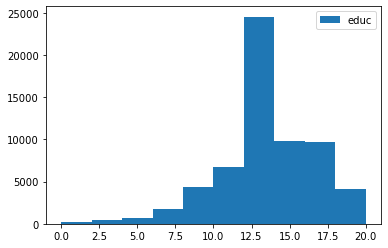

In [3]:
# Lecture

# select the series/colum from the df and store it in a variable for convineance. The variable evaluates to the same series/column when used later in the code.
educ= gss['educ']

# drop missing values and construct histogram.
plt.hist(educ.dropna(), label= 'educ')                  # most of the respondents (about 25,000) have about 12 years of education.
plt.legend()
plt.show()

<AxesSubplot:xlabel='educ', ylabel='Count'>

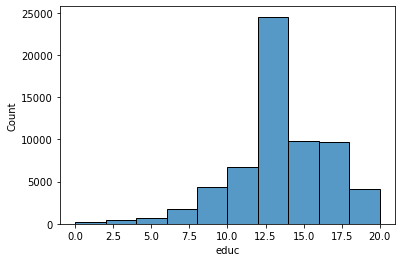

In [4]:
# same histogram as above but produced here with sns. No need for label here since xlabel has been applied by default.
sns.histplot(educ.dropna(), bins= 10)

In [5]:
# Probability Mass Function: PMF is better in this case when we have limited number of categories with unique values. It provides unique values in a dataset and how 
# often each one appears.

# find the count of each value
educ_counts= educ.value_counts(sort= True, normalize= True)           # normalize= True computes proportions/percentages.
educ_counts.head()
#educ_counts[12]                    # the count/fraction of a particular value can be extracted using []. The fraction of people with 12 years of education is 30.7%.

12.0    0.307284
16.0    0.127648
14.0    0.112031
13.0    0.086752
11.0    0.062018
Name: educ, dtype: float64

In [6]:
# convert the type of educ_counts from Series to DataFrame
df_educ_counts= pd.DataFrame(educ_counts)     # default column name and index are alloted.
df_educ_counts

# change the index to regular column
df_educ_counts= df_educ_counts.reset_index()  
df_educ_counts

# change the existing names of the columns to the desirable ones
df_educ_counts.columns= ['Years', 'Prob']

# The resulting dataframe with values(outcomes) and probabilites is called Probability Mass Function (PMF). Interpretation: 30.7% respondents in the sample have 12
# years of education. Or, there is 30.7% probability that a randomly selected person/respondent has 12 years of education. PMF applies to discrete variables. 
df_educ_counts.head()

,Years,Prob
0,12.0,0.307284
1,16.0,0.127648
2,14.0,0.112031
3,13.0,0.086752
4,11.0,0.062018


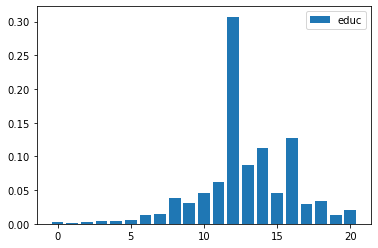

In [7]:
# plot the above PMF through bar chart in Matplotlib
fig, ax= plt.subplots()
ax.bar(df_educ_counts['Years'], df_educ_counts['Prob'], label= 'educ')
plt.legend()
plt.show()

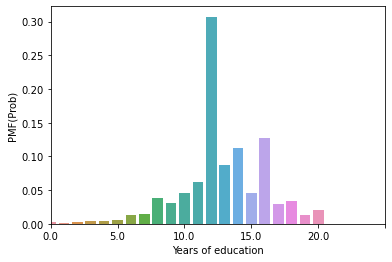

In [8]:
# plot the above PMF through bar chart in Seaborn with some functionalities taken from Matplotlib
fig, ax= plt.subplots()
sns.barplot(x= 'Years', y= 'Prob', data= df_educ_counts, ax= ax)
ax.set_xlim(0, 25)
ax.set_xticks([0, 5, 10, 15, 20, 25])
ax.set_xlabel('Years of education')
ax.set_ylabel('PMF(Prob)')
#sns.catplot(x= 'Years', y= 'Prob', data= df_educ_counts, kind= 'bar', ax= ax)

plt.show()

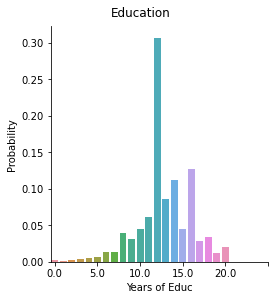

In [9]:
# plot the above PMF through Seaborn catplot with kind= bar with limited functionality taken from Matplotlib
g = sns.catplot(x= 'Years', y="Prob", data=df_educ_counts, kind= 'bar', height= 4)
g.set(xlabel= 'Years of Educ', ylabel= 'Probability')
g.fig.suptitle('Education', y= 1.03)
plt.xticks([0, 5, 10, 15, 20, 25])     
plt.show(g)

In [10]:
# Exercises:
# In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.
# The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library (doesn't work here).

#Using my own approach to solve the same problem

# store the column in variable
year= gss['year']

# produce the years along with counts. sort= True by default, so sorted in descending order.
year_counts= year.value_counts()
year_counts.head()
year_counts[2016]         # extract a particular value using []


2867

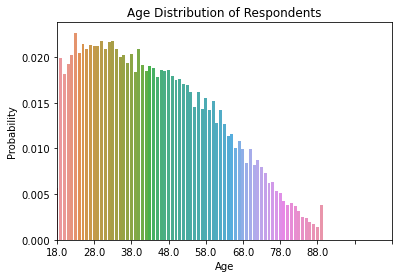

In [13]:
# plot the above PMF through bar chart in Seaborn with some functionalities taken from Matplotlib
fig, ax= plt.subplots()    # CANNOT be used with catplot since catplot itself is a fig object. Same I think will apply to relplot as well.
sns.barplot(x= 'age', y= 'prob',data= df_pmf_age, ax= ax)
ax.set_xlim(0, 90)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xlabel('Age')
ax.set_ylabel('Probability')
ax.set_title('Age Distribution of Respondents')

plt.show()

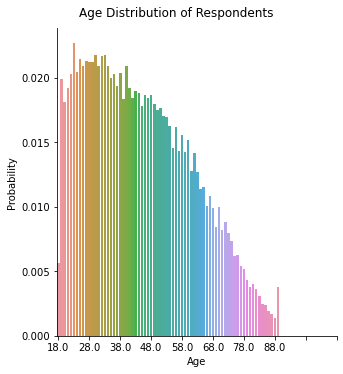

In [14]:
# Plot a PMF
# Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

# Select the 'age' column from the gss DataFrame and store the result in age.
age = gss['age']
age

# Make a normalized PMF of age. Store the result in pmf_age.
pmf_age= age.value_counts(normalize= True)              # PMF contains values (age in this example) and their associated proportions.
pmf_age
pmf_age[19]

# convert pmf_age into a dataframe
df_pmf_age= pd.DataFrame(pmf_age)
df_pmf_age

# change the index to a regular column
df_pmf_age= df_pmf_age.reset_index()
df_pmf_age

# change the column names
df_pmf_age= df_pmf_age.rename(columns= {'index':'age', 'age':'prob'})
df_pmf_age

# Plot pmf_age as a bar chart.
g= sns.catplot(x= 'age', y= 'prob',data= df_pmf_age, kind= 'bar', height= 5)
g.set(xlabel= 'Age', ylabel= 'Probability')
#g.set(xticks= [20, 30, 40, 50, 60, 70, 80, 90])
g.fig.suptitle('Age Distribution of Respondents', y= 1.03)
# plt.set_xlim(0, 90)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])  
plt.show()

# ax.set_xlim(0, 25)
# ax.set_xticks([0, 5, 10, 15, 20, 25])

## Cumulative distribution function
* CDF gives a probability of randomly selecting a value equal to or less than x.
* PMF gives a probability of randomly selecting a value that is exactly equal to x.

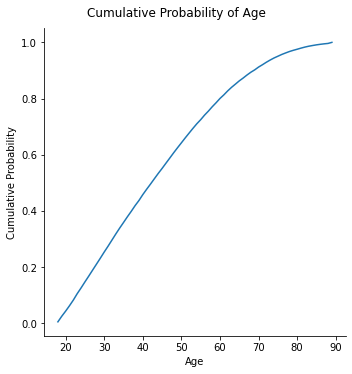

33    0.660201
Name: cum_prob, dtype: float64

In [15]:
# Since there is no such function available, I have to compute CDF manually as:

# store the age column/series in variable 'age'
age= gss['age']
#print(type(age))      # age is a series since it contains the series

# converts age into Numpy array and then sort it. The series does not have method sort(), so it had to be converted to array first.
age_np= np.sort(age)
#print(age_np)      
#print(type(age_np))    # age_np is a Numpy array.

# converts the Numpay array back to Series so that method value_counts() can be applied to it
age_series= pd.Series(age_np)
#print(age_series)
#print(type(age_series))  # age_series is a Series

# fine the count of each age in the series
age_series= age_series.value_counts()
#age_series

# converts the series to dataframe
age_df= pd.DataFrame(age_series)
# change the index to a regular colum
age_df = age_df.reset_index()
# rename the columns
age_df = age_df.rename(columns= {'index':'age', 0:'counts'})
# sort the dataframe by column age
age_df = age_df.sort_values(by='age')
# reset the index in proper order and drop the existing index since it is not in sequence or order after the sort above
age_df= age_df.reset_index(drop=True)

# print the first 10 rows
age_df.head(10)
# age_df.iloc[5]    # extract a particular observation/row

# insert a new column 'prop', containing proportions/probabilities
age_df['prop'] = age_df['counts']/sum(age_df['counts'])
age_df

# insert a new column 'cum_prob', containing cumulative probabilites
age_df['cum_prob'] = np.cumsum(age_df['prop'])
age_df
#age_df.iloc[5]
#sum(age_df['counts'])

# plot the cdf using relplot with kind= 'line'
g= sns.relplot(x= 'age', y= 'cum_prob', data= age_df, kind= 'line')
g.set(xlabel= 'Age', ylabel= 'Cumulative Probability')               # set x and y labels using seaborn
#g.set(xticks= [20, 30, 40, 50, 60, 70, 80, 90])                     # set xticks using seaborn
g.fig.suptitle('Cumulative Probability of Age', y= 1.03)             # give title using seaborn
# plt.set_xlim(0, 90)                                                # set range for x-axising using matplotlib
#plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])                 # set xticks using matplotlib
plt.show()

# find the probability of selecting someone 51 year old or younger
age_df[age_df['age']==51]['cum_prob']

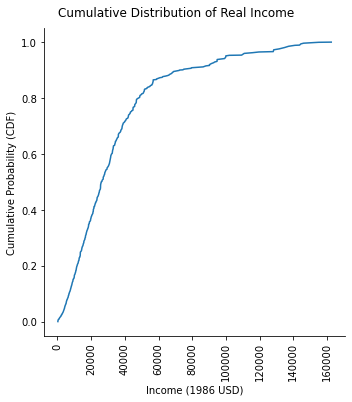

In [20]:
# Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in 
# the presence of errors or extreme values.
# In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already 
# been computed and stored in cdf_income.

# Calculate the 75th percentile of income and store it in percentile_75th.

# initial work to get the data ready for CDF
gss.head()
real_income= gss['realinc']                                                                     # store the series
real_income.head()
real_income= real_income.value_counts()                                                         # produce count of each unique value in the series
real_income.head()
df_real_income= pd.DataFrame(real_income)                                                        # convert the series into dataframe
df_real_income.head()
df_real_income= df_real_income.reset_index()                                                      # make the index column a regular column
df_real_income.head()
df_real_income= df_real_income.rename(columns= {'index':'real income', 'realinc':'counts'})       # rename the columns
df_real_income.head()
df_real_income= df_real_income.sort_values(by= 'real income')                                     # sort the dataframe by column real income in ascending order
df_real_income.head()
df_real_income= df_real_income.reset_index(drop= True)                                            # reset the index from 0 to the end and drop the existing index
df_real_income.head()

# compute proportions/probabilities and cumulative probabilities
df_real_income['prop']= df_real_income['counts']/sum(df_real_income['counts'])                    # compute the proportion/probability of each real income
df_real_income.head()
df_real_income['cum_prob']= np.cumsum(df_real_income['prop'])
df_real_income.head()

# compute the required IQR, the difference between 75th and 25th percentiles
percentile_75th= int((df_real_income[(df_real_income['cum_prob'] >= 0.75) & (df_real_income['cum_prob'] < 0.751)])['real income'])
percentile_75th
percentile_25th= int((df_real_income[(df_real_income['cum_prob'] >= 0.25) & (df_real_income['cum_prob'] < 0.251)])['real income'])
percentile_25th
IQR= percentile_75th - percentile_25th
IQR

# Plot a CDF

#The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.
# In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by 
# plotting the CDF.

g= sns.relplot(x= 'real income', y= 'cum_prob', data= df_real_income, kind= 'line')
g.set(xlabel= 'Income (1986 USD)', ylabel= 'Cumulative Probability (CDF)')
g.fig.suptitle('Cumulative Distribution of Real Income', y= 1.03)
g.set(xticks= [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])
plt.xticks(rotation= 90)

plt.show()

##############################################################################################################################################################
# These steps can be skipped in constructing CDF
# np_real_income= np.sort(real_income)       # convert the series into numpy array and then sort it in ascending order
# np_real_income
# series_real_income= pd.Series(np_real_income)   # convert back the numpy array back to the series so that value_counts() method can be applied to it
##############################################################################################################################################################

## Comparing distributions

In [21]:
# Distribution of education
# Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called gss. The variable educ 
# represents the respondent's years of education.

# What fraction of respondents report that they have 12 years of education or fewer?

# get the data ready
education= gss['educ']
education= education.value_counts()                                               # produce the count of each value
df_education= pd.DataFrame(education)                                             # convert the series to dataframe
df_education= df_education.reset_index()                                          # reset index to convert index into a regular column
df_education= df_education.rename(columns= {'index':'years', 'educ':'counts'})    # rename the columns
df_education= df_education.sort_values(by= 'years')                               # sort the values by a column in an ascending order
df_education= df_education.reset_index(drop= True)                                # reset index from 0 and drop the existing index, which is not in sequence
df_education.head()

# add the colum for proportions/probabilities and cumulative probabilities
df_education['prop']= df_education['counts']/sum(df_education['counts'])
df_education['cum_prob']= np.cumsum(df_education['prop'])
df_education.head()

# answer the main question here now
df_education[df_education['years']==12]   # 30.7% of the respondents that they have exactly 12 years of education and 53.2% have 12 or less than 12 years of education.

,years,counts,prop,cum_prob
12,12.0,19145,0.307284,0.532261


In [22]:
# Extract education levels
# Let's create Boolean Series to identify respondents with different levels of education.
# In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably
# completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

# Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
education= gss['educ']
# Bachelor's degree
batch= education[education >= 16]
# Associate degree
assc= education[(education >= 14) & (education < 16)]
# High school
high= education[education <= 12]
# Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.
mean_high= len(high)/len(education)
mean_high 

0.5308807991547402

In [23]:
# Plot income CDFs
# Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted 
# the income CDFs of respondents interviewed before and after 1995:
       # Cdf(income[pre95]).plot(label='Before 1995')
       # Cdf(income[~pre95]).plot(label='After 1995')
# You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

# from previous exercise
education= gss['educ']
# Bachelor's degree
batch= education[education >= 16]
# Associate degree
assc= education[(education >= 14) & (education < 16)]
# High school
high= education[education <= 12]

# get data ready for batch CDF
batch= batch.value_counts()
df_batch= pd.DataFrame(batch)
df_batch= df_batch.reset_index()
df_batch= df_batch.rename(columns= {'index':'years', 'educ':'counts'})
df_batch= df_batch.sort_values(by= 'years')
df_batch['prop']= df_batch['counts']/sum(df_batch['counts'])
df_batch['cum_prob']= np.cumsum(df_batch['prop'])
df_batch.head()

# get data ready for assc CDF
assc= assc.value_counts()
df_assc= pd.DataFrame(assc)
df_assc= df_assc.reset_index()
df_assc= df_assc.rename(columns= {'index':'years', 'educ':'counts'})
df_assc= df_assc.sort_values(by= 'years')
df_assc['prop']= df_assc['counts']/sum(df_assc['counts'])
df_assc['cum_prob']= np.cumsum(df_assc['prop'])
df_assc.head()

# get data ready for high CDF
high= high.value_counts()
df_high= pd.DataFrame(high)
df_high= df_high.reset_index()
df_high= df_high.rename(columns= {'index':'years', 'educ':'counts'})
df_high= df_high.sort_values(by= 'years')
df_high['prop']= df_high['counts']/sum(df_high['counts'])
df_high['cum_prob']= np.cumsum(df_high['prop'])

# construct the CDFs now
# g= sns.relplot(x= 'years', y= 'cum_prob',data= df_batch, kind= 'line')
# g= sns.relplot(x= 'years', y= 'cum_prob',data= df_assc, kind= 'line')
# g= sns.relplot(x= 'years', y= 'cum_prob',data= df_high, kind= 'line')

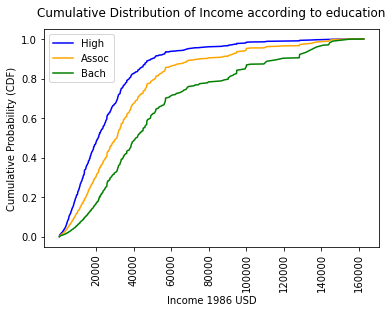

In [24]:
# The above exercise requires the following actually. 
# Let's now see what the distribution of income looks like for people with different education levels.

gss.head()
education= gss['educ']

# seperate the real income for people with different level of education
boolean_bach= education >=16
boolean_assc= (education >= 14) & (education < 16)
boolean_high= education <= 12

income_bach= gss['realinc'][boolean_bach]            # real income of bachelors
income_assc= gss['realinc'][boolean_assc]            # real income of associates
income_high= gss['realinc'][boolean_high]            # real income of high school attendees

# compute CDF of real income for each level of education
income_bach= income_bach.value_counts()
df_income_bach= pd.DataFrame(income_bach)
df_income_bach= df_income_bach.reset_index()
df_income_bach= df_income_bach.rename(columns= {'index':'real income', 'realinc':'counts'})
df_income_bach= df_income_bach.sort_values(by= 'real income')
df_income_bach= df_income_bach.reset_index(drop= True)
df_income_bach['prop']= df_income_bach['counts']/sum(df_income_bach['counts'])
df_income_bach['cum_prob']= np.cumsum(df_income_bach['prop'])
df_income_bach.head()

income_assc= income_assc.value_counts()
df_income_assc= pd.DataFrame(income_assc)
df_income_assc= df_income_assc.reset_index()
df_income_assc= df_income_assc.rename(columns= {'index':'real income', 'realinc':'counts'})
df_income_assc= df_income_assc.sort_values(by= 'real income')
df_income_assc= df_income_assc.reset_index(drop= True)
df_income_assc['prop']= df_income_assc['counts']/sum(df_income_assc['counts'])
df_income_assc['cum_prob']= np.cumsum(df_income_assc['prop'])
df_income_assc.head()

income_high= income_high.value_counts()
df_income_high= pd.DataFrame(income_high)
df_income_high= df_income_high.reset_index()
df_income_high= df_income_high.rename(columns= {'index':'real income', 'realinc':'counts'})
df_income_high= df_income_high.sort_values(by= 'real income')
df_income_high= df_income_high.reset_index(drop= True)
df_income_high['prop']= df_income_high['counts']/sum(df_income_high['counts'])
df_income_high['cum_prob']= np.cumsum(df_income_high['prop'])
df_income_high.head()

# plot the CDFs now for all levels of education on the same graph
fig, ax= plt.subplots()
#plt.figure(figsize=(20, 16))
ax.plot(df_income_high['real income'], df_income_high['cum_prob'], color= 'blue', label= 'High')
ax.plot(df_income_assc['real income'], df_income_assc['cum_prob'], color= 'orange', label= 'Assoc')
ax.plot(df_income_bach['real income'], df_income_bach['cum_prob'], color= 'green', label= 'Bach')
ax.set_xlabel('Income 1986 USD')
ax.set_ylabel('Cumulative Probability (CDF)')
ax.set_title('Cumulative Distribution of Income according to education', y= 1.03)
ax.set_xticks([20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])
plt.xticks(rotation= 90)

plt.legend()
plt.show()


In [25]:
df_income_high.head()

,real income,counts,prop,cum_prob
0,234.00,18,0.000619,0.000619
1,236.50,18,0.000619,0.001238
2,245.00,18,0.000619,0.001857
3,259.00,28,0.000963,0.002820
4,267.75,12,0.000413,0.003232


## Modeling distributions
* Cumulative Distribution Function (CDF) gives a better view of the data when exploring it without getting distracted by noise (both discrete and continous variable)
* Probability Mass Function (PMF) is better for a distribution with a small number of unique values (discrete variable)
* Probability Density Funciton (PDF) or Kernel Density Estimation (KDE) is better for a distribution with a lot of values (continous variable). PDF=KDE

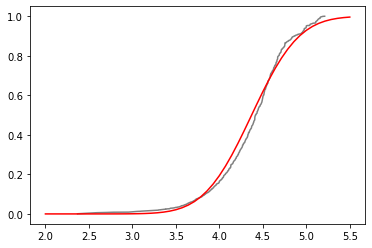

In [26]:
# Distribution of income
# In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether
# that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.
# Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

# Extract 'realinc' from gss and compute its logarithm using np.log10().
income= gss['realinc']
log_income= np.log10(income)
# Compute the mean and standard deviation of the result.
mean= log_income.mean()
sd= log_income.std()
# Make a norm object by passing the computed mean and standard deviation to norm(). It will create the normal distribution with the given mean and standard deviation.
dist= norm(mean, sd)

# To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution 
# with the same mean and standard deviation.

# compute the CDF of log_income
log_income= log_income.value_counts()
df_log_income= pd.DataFrame(log_income)
df_log_income= df_log_income.reset_index()
df_log_income= df_log_income.rename(columns= {'index':'log income', 'realinc':'counts'})
df_log_income= df_log_income.sort_values(by= 'log income')
df_log_income= df_log_income.reset_index(drop= True)
df_log_income['prop']= df_log_income['counts']/sum(df_log_income['counts'])
df_log_income['cum_prob']= np.cumsum(df_log_income['prop'])
df_log_income.head()

# compute the CDF of a normal distribution with the same mean and standard deviation stored above in dist
xs= np.linspace(2, 5.5)          # produces equally spaced 50 values between -3 and 3
ys= dist.cdf(xs)                # produces such probabilites for the 50 values so that the entire distribution (values plus their probabilities) is normal with the
                                # given mean and standard deviation.
fig, ax= plt.subplots()
ax.plot(df_log_income['log income'], df_log_income['cum_prob'], label= 'Log Income', color= 'gray')
ax.plot(xs, ys, label= 'normal distribution', color= 'red')   # xs= values and ys= their cumulative probabilities

plt.show()                 # the CDF of the log of real income (with certain mean and standard deviation) appears the same as the CDF of a normal distribution (with
                           # the same mean and standard deviation), thus, log real income is almost normally distributed.

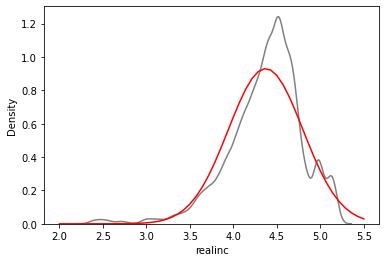

In [27]:
# Comparing PDFs
# In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do 
# in this exercise!
# As before, the norm object dist is available in your workspace:
# Just as all norm objects have a .cdf() method, they also have a .pdf() method.
# To create a KDE plot, you can use Seaborn's kdeplot() function. Here, Seaborn has been imported for you as sns.

# Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.
fig, ax= plt.subplots()

income= gss['realinc']
log_income= np.log10(income)            # convert income into its log
sns.kdeplot(log_income, color= 'gray')  # both are automatically shown on same graph. ax=ax is also valid. sns.kdeplot() produces itself the associated probabilities
                                        # for log_income values and plot the PDF.
# Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.
ys= dist.pdf(xs)                        # produces such probabilites for the 50 values (stored in xs) so that the entire distribution (values plus their probabilities)
                                        # is normal with the given mean and standard deviation.    
ax.plot(xs, ys, color= 'red')
plt.show()                              # CDF shows that log_income is more normally distributed that PDF. PDF is too sensitive.

# Chapter 3: Exploring relationships

## Scatter graphs

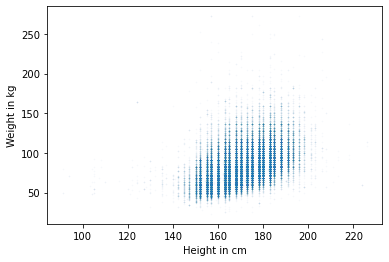

In [28]:
brfss= pd.read_hdf('brfss.hdf5', 'brfss')
height= brfss['HTM4']
weight= brfss['WTKG3']
# plot the scatterplot
fig, ax= plt.subplots()
#ax.scatter(height, weight)                                       # plt.scatter() is slow. Maybe ax.scatter() is the same. plt.scatter() is the same as ax.scatter()
ax.plot(height, weight, 'o', alpha=0.02, markersize= 1)           # plt.plot makes a line plot. But it also makes a scatter plot and fast with argument 'o' 
ax.set_xlabel('Height in cm')
ax.set_ylabel('Weight in kg')

plt.show()
# the first plot is overplotted, data points laying on top of each other. Use aplha. Still overplotted. smaller markers. discrete columns. jittering (random noise).

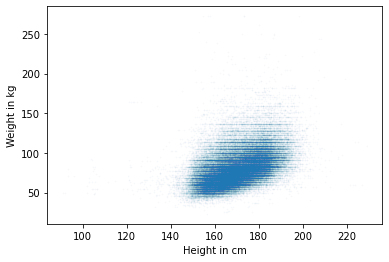

In [29]:
jitter= np.random.normal(0, 2, size= len(brfss))  # produces an array random numbers normally distributed with mean 0 and sd 2 of length(brfss) or 100000
height_jitter= height + jitter                    # the first element in the array (jitter) is added to the first element in the series (height), the second element
                                                  # in the array (jitter) added to the second element in the series (height) and so on to produce the new series.
fig, ax= plt.subplots()
ax.plot(height_jitter, weight, 'o', alpha=0.02, markersize= 1)
ax.set_xlabel('Height in cm')
ax.set_ylabel('Weight in kg')

plt.show()
# now rows. Jitter rows as well.

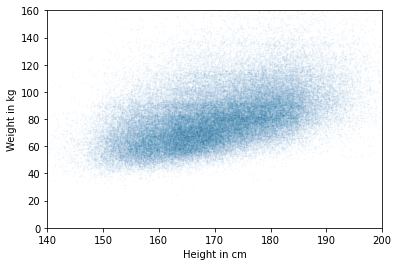

In [30]:
jitter= np.random.normal(0, 2, size= len(brfss))  # produces an array random numbers normally distributed with mean 0 and sd 2 of length(brfss) or 100000
height_jitter= height + jitter                    # the first element in the array (jitter) is added to the first element in the series (height), the second element
                                                  # in the array (jitter) added to the second element in the series (height) and so on to produce the new series.
    
jitter_w= np.random.normal(0, 2, size= len(brfss))   # same comments as above.
weight_jitter= weight + jitter_w

fig, ax= plt.subplots()
ax.plot(height_jitter, weight_jitter, 'o', alpha=0.025, markersize= 1)
ax.set_xlabel('Height in cm')
ax.set_ylabel('Weight in kg')
ax.axis([140, 200, 0, 160])                         # set the upper and lower limits on x and y axes.

plt.show()
# rows are gone now as well. zoom in by setting the upper and lower limits.

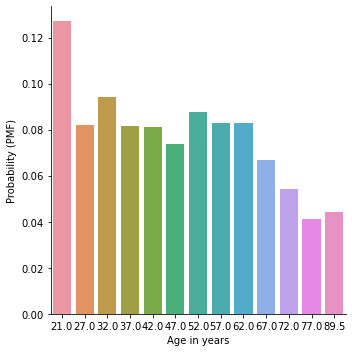

In [31]:
# Exercises

# PMF of age
# Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter
# plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have 
# a .bar() method to make a bar chart.
# The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded 
# off into 5-year bins. 'AGE' contains the midpoint of the bins.

# Extract the variable 'AGE' from the DataFrame brfss and assign it to age.
age= brfss['AGE']
age= age.value_counts()
df_age= pd.DataFrame(age)
df_age= df_age.reset_index()
df_age= df_age.rename(columns= {'index':'age', 'AGE':'counts'})
df_age= df_age.sort_values(by= 'age')
df_age= df_age.reset_index(drop= True)
df_age['prop']= df_age['counts']/sum(df_age['counts'])

g= sns.catplot(x= 'age', y= 'prop', data= df_age, kind= 'bar')
g.set(xlabel= 'Age in years', ylabel= 'Probability (PMF)')

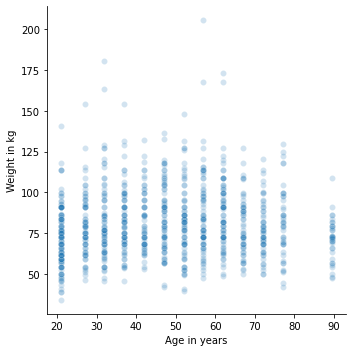

In [32]:
# Scatter plot
# Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.
# weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

# # Select the first 1000 respondents
brfss_1000= brfss[:1000]                     # with [] without loc and iloc, we can select only rows. select rows from index 0 till index 999. index 1000 is exclusive.
weight= brfss_1000['WTKG3']
age= brfss_1000['AGE']
g= sns.relplot(x= age, y= weight, data= brfss_1000, kind= 'scatter', alpha= 0.2, marker= 'o')
g.set(xlabel= 'Age in years', ylabel= 'Weight in kg')
plt.show()
# since age has been rounded off into categories of 5, that is why there is no values between those categories/bins and we get columns. Jittering is the solution.

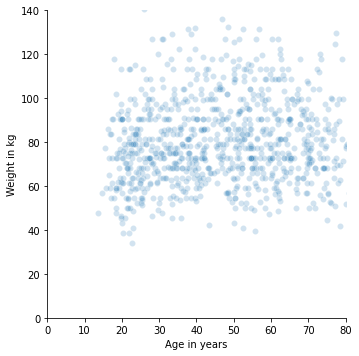

In [34]:
# In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more
# clearly.

# Add random noise to age with mean 0 and standard deviation 2.5.
jitter_a= np.random.normal(0, 2.5, size= len(brfss_1000))
age_jitter= age + jitter_a

#Make a scatter plot between weight and age with marker size 5 and alpha=0.2. Be sure to also specify 'o'.
g= sns.relplot(x= age_jitter, y= weight, data= brfss_1000, kind= 'scatter', alpha= 0.2, marker= 'o')
g.set(xlabel= 'Age in years', ylabel= 'Weight in kg')
plt.axis([0, 80, 0, 140])                         # set the upper and lower limits on x and y axes. This works in seaborn as well
plt.show()
# columns disppeared after smoothing, that is, adding random noise.

## Visualizing relationships (Bar,Violin, Box)

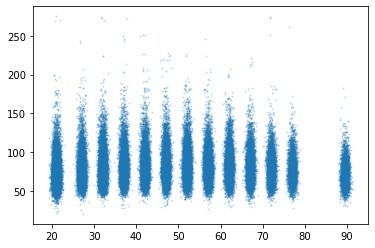

In [35]:
# For full data set
age= brfss['AGE'] + np.random.normal(0, 0.5, size= len(brfss)) # produce normally distributed random values with mean 0 and sd 0.5 of the given size
weight= brfss['WTKG3'] + np.random.normal(0, 2, size= len(brfss))

fig,ax= plt.subplots()
ax.plot(age, weight, 'o', markersize= 1, alpha= 0.2)
plt.show()
# columns due to categorization of age. Gives an idea of weight in each age group. To see this further, use violin plot as:

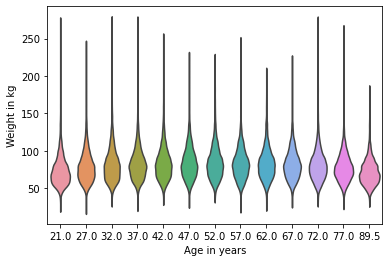

In [36]:
# violin plot:
data= brfss.dropna(subset= ['AGE', 'WTKG3']) # creates a new dataframe where there are no NaNs in the given columns. Violin plots can't handle NaNs.
data[['AGE', 'WTKG3']].isnull().sum()        # no NaNs exist in these two columns after dropping
g= sns.violinplot(x= 'AGE', y= 'WTKG3', data= data, inner= None)   # inner= None simplifies things. Each column is the graphical representation of the distribution of
g.set(xlabel= 'Age in years', ylabel= 'Weight in kg')              # weight in one age group. Alternative to this is a box plot.

plt.show()

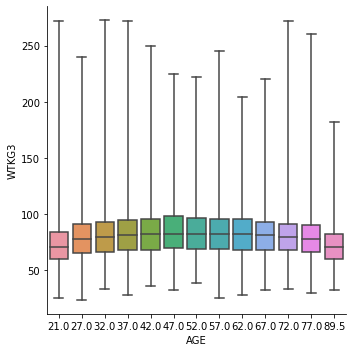

In [37]:
# Box plot
g= sns.catplot(x= 'AGE', y= 'WTKG3', data= data, kind= 'box', whis= 10)  
# whis turns off a feature we don't need (extends whiskers it seems). Each box represents IQR from 75th to 25th percentiles with the centre line showing median. The 
# spines shows min and max values. Better than the other graphs. looking at the median, people in 40s seems little heavier than younger and older people. thus, the 
# relationship between age and weight does not seem linear, so correlation may be misleading. looking at sizes of the boxes, people in 40s seems to have more variabi-
# lity in their weights. regarding skewness, the heaviest people are much farther from the median than the lightest people. data that is skewed towards higher values,
# it may be useful to look at it on a logarithmic scale.

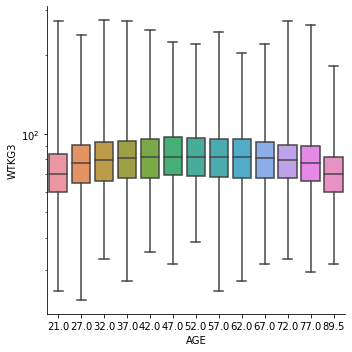

In [38]:
g= sns.catplot(x= 'AGE', y= 'WTKG3', data= data, kind= 'box', whis= 10)  
plt.yscale('log')       # perhaps converts weights into log10(weights) and then plot them (on the y-axis). Seems more clear now. Use this figure.    
plt.show()

* code for something

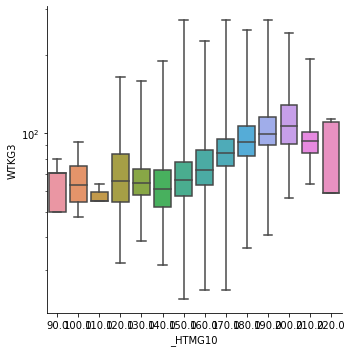

In [39]:
# Height and weight
# Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box 
# plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.
    # Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:
    # sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
    # plt.yscale('log')
    
# Fill in the parameters of .boxplot() to plot the distribution of weight ('WTKG3') in each height ('_HTMG10') group. Specify whis=10, just as was done
# in the video.
g= sns.catplot(x= '_HTMG10', y= 'WTKG3', data= brfss, kind= 'box', whis= 10)
# Add a line to plot the y-axis on a logarithmic scale.
plt.yscale('log')

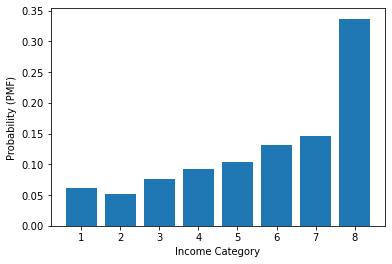

In [40]:
# Distribution of income
# In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical 
# variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything 
# else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

income= brfss['INCOME2']
income= income.value_counts()
df_income= pd.DataFrame(income)
df_income= df_income.reset_index()
df_income= df_income.rename(columns= {'index':'income_category', 'INCOME2':'counts'})
df_income= df_income.sort_values(by= 'income_category')
df_income= df_income.reset_index(drop= True)
df_income['prop']= df_income['counts']/sum(df_income['counts'])

fig, ax= plt.subplots()
ax.bar('income_category', 'prop', data= df_income)
ax.set_xlabel('Income Category')
ax.set_ylabel('Probability (PMF)')

plt.show()

#g= sns.catplot(x= 'income_category', y= 'prop', data= df_income, kind= 'bar')

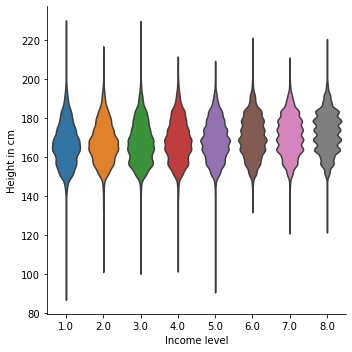

In [41]:
# Income and height
# Let's now use a violin plot to visualize the relationship between income and height.

# Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.
# Drop rows with missing data
data= brfss.dropna(subset= ['HTM4', 'INCOME2'])
data[['HTM4', 'INCOME2']].isnull().sum()         # verify that these two columns have no NaNs

# Make a violin plot
g= sns.catplot(x= 'INCOME2', y= 'HTM4', data= data, kind= 'violin', inner= None)
g.set(xlabel= 'Income level', ylabel= 'Height in cm')


## Correlation
Strong correlations help us make better predictions. <br>
Correlation only works for linear relations. Strong non-linear relation is underestimated by correlation. <br>
Strong corelation (close to 1 or -1) means strong linear relationship, but correlation close to 0 doesn't mean there is no relationship. There might be a strong non-linear relationship. <br>
Correlation does not indicate causality.

In [42]:
# Computing correlations

# The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of 
# vegetables respondents reported eating per day.
# Let's see how this variable relates to age and income.

# From the brfss DataFrame, select the columns 'AGE', 'INCOME2', and '_VEGESU1'.
columns= ['AGE', 'INCOME2', '_VEGESU1']
subset= brfss[columns]                        # creates a dataframe containing these 3 columns

# Compute the correlation matrix for these variables.
subset.corr()


,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


## Simple regression
It provides the causal relationship between two linearly related variables. For non-linear relationships, other methods should be used. 


In [43]:
# Income and vegetables
# As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.
# Let's estimate the slope of the relationship between vegetable consumption and income.

# Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.
subset= brfss.dropna(subset= ['INCOME2', '_VEGESU1'])
xs= subset['INCOME2']
ys= subset['_VEGESU1']
    
# Compute the simple linear regression of these variables
res= linregress(xs, ys)   # interpret the regression output as usual. Overall, the p-value shows insignificant result, meaning that assuming
res                       # the linear relationship between the two variables, income has no significant effect on consumption and hence the
                          # result cannot be generalized to the entire population. But there could be non-linear relationship between the two
                          # variables, which is not captured by the simple linear regression.

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)

In [44]:
# Fit a line
# Continuing from the previous exercise:
    # Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and
    # res contains the results of a simple linear regression of ys onto xs.
# Now, you're going to compute the line of best fit. NumPy has been imported for you as np.
import numpy as np

# Set fx to the minimum and maximum of xs, stored in a NumPy array.
fx= np.array([xs.min(), xs.max()])
fy= res.intercept + res.slope * fx               # fy computes the predicted values for given values of fx (min xs and max xs)
fx, res.intercept, res.slope, res.slope * fx, fy

(array([1., 8.]),
 1.5287786243363113,
 0.06988048092105006,
 array([0.06988048, 0.55904385]),
 array([1.59865911, 2.08782247]))

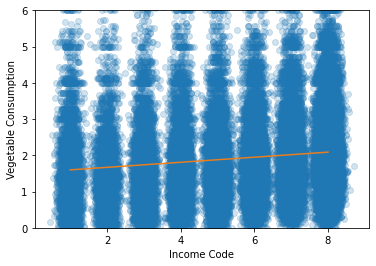

In [45]:
plt.clf                   # to clear the existing figure
xs_jitter= xs + np.random.normal(0, 0.15, len(xs))
fig, ax= plt.subplots()
ax.plot(xs_jitter, ys, 'o', alpha= 0.2)   # xs contains income and ys contains vegetables serving or consumption.

ax.plot(fx, fy, '-',alpha= 0.9)         # fx contains min and max of x variable. fy contains predicted values for the given values of x vari-
                                        # able stored in fx. So, we have two pairs of xy cordinates (min of x variable and its predicted value,
                                        # max of x varible and its predicted value), which are sufficient to construct the line.
plt.ylim([0, 6])
ax.set_xlabel('Income Code')
ax.set_ylabel('Vegetable Consumption')

plt.show()

# Chapter 4: Multivariate thinking
A regression of A onto B is not the same as regression of B onto A especially in simple regression. <br>
A causation in regression (which variable is to be set as independent and which to be set as dependent variable) should come from theory rather from the regression results.

In [46]:
# Using StatsModels
brfss= pd.read_hdf('brfss.hdf5', 'brfss')
# Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

# Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().
subset= brfss.dropna(subset= ['INCOME2', '_VEGESU1'])        
xs= subset['INCOME2']
ys= subset['_VEGESU1']
res= linregress(xs, ys)          # independent variable (income) is listed first and then the dependent variable (vegetable consumption)
print(res)
# Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().
results= smf.ols('ys ~ xs', data= subset).fit()    # dependent variable (vegetable consumption) is listed first and then the independent variable
results.params                                     # (income). Also, the object is returned and stored in results.
# both gives the same results since x and y variables are the same.

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)


Intercept    1.528779
xs           0.069880
dtype: float64

## Multiple regression

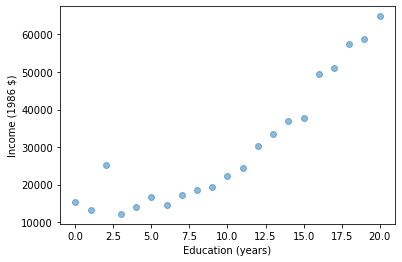

In [47]:
# Plot income and education
# To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each
# group.
# Here, the GSS dataset has been pre-loaded into a DataFrame called gss.
gss= pd.read_hdf('gss.hdf5', 'gss')
grouped= gss.groupby('educ')
mean_income_by_educ= grouped['realinc'].mean()
# Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5.
fig, ax= plt.subplots()
ax.plot(mean_income_by_educ, 'o', alpha= 0.5)   # note that both variables are contained in mean_income_by_educ.
ax.set_xlabel('Education (years)')
ax.set_ylabel('Income (1986 $)')
plt.show()                           # it looks like the relationship between education and income is non-linear. To me it looks more linear.

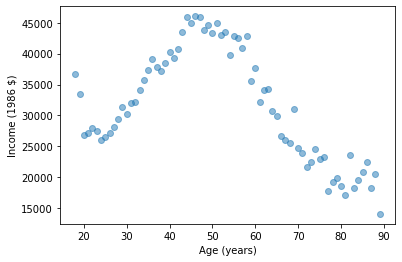

age
18.0    36696.140255
19.0    33456.860419
20.0    26806.371609
21.0    27161.578191
22.0    27965.731410
Name: realinc, dtype: float64

In [48]:
# do the same for age
grouped1= gss.groupby('age')
mean_income_by_age= grouped1['realinc'].mean()
# Plot mean_income_by_age as a scatter plot. Specify 'o' and alpha=0.5.
fig, ax= plt.subplots()
ax.plot(mean_income_by_age, 'o', alpha= 0.5)   
ax.set_xlabel('Age (years)')
ax.set_ylabel('Income (1986 $)')
plt.show()                        # the relationship between the two variables is clearly not linear.

mean_income_by_age.head()    

In [49]:
# Non-linear model of education
# The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear 
# model.

# Add a column named 'educ2' to the gss DataFrame; it should contain the values from 'educ' squared.
gss['educ2']= gss['educ'] ** 2
gss['age2']= gss['age'] ** 2
# Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'.
results= smf.ols('realinc ~ educ', data= gss).fit()   # with 1 year increase in education, income increases on average by $3,586.
results.params

results1= smf.ols('realinc ~ educ+age', data= gss).fit() # with 1 year increase in education, income increases on average by $3,655. With 1 year 
results1.params                                          # increase in age, income increases by $83. If the relationships between education and income
                                                         # and between age and income are non-linear, then these results could be misleading.
    
results2= smf.ols('realinc ~ educ + educ2 + age', data= gss).fit() 
results2.params 
# with 1 year increase in education, income decreases on average by $529. With 1 year increase in age, income increases by $53 now. The coefficient of
# educ2 is hard even to interpret. It seems using square of education has messed up the results since we have forced non-linear model in terms of educ-
# when the relationship is linear.

results3= smf.ols('realinc ~ educ + educ2 + age + age2', data= gss).fit() 
results3.params                                                           
# The coefficient of education still does not make sense. The coefficient on age has improved, however, from only $83 to $1696, which makes more sense.
# It appears educ2 should be dropped.

results4= smf.ols('realinc ~ educ + age + age2', data= gss).fit() # This appears to be the best mode.
results4.params                                                           
# Summary: Multiple regression can account for both linear and non-linear relationships. Also, one must take into consideration if the two variable are
# linearly or non-linearly related. Choosing a wrong model produces highly misleading results.

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

In [50]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,educ2,age2
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893,324.0,676.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,144.0,1444.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,144.0,3249.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,196.0,3721.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893,144.0,3481.0


## Visualizing regression results

In [51]:
gss['educ2']= gss['educ'] ** 2
gss['age2']= gss['age'] ** 2

results= smf.ols('realinc ~ educ + educ2 + age + age2', data= gss).fit() 
results.params 

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

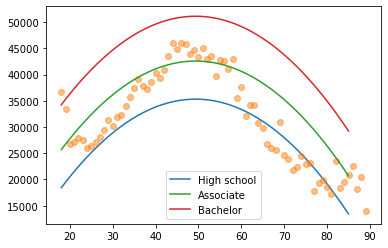

In [52]:
# Generating predictions
df= pd.DataFrame()
df['age']= np.linspace(18, 85)     # almost minimum and maximum ages in the data frame. Produces 50 equally spaced values between 18 and 85
df['age2']= df['age'] ** 2

df['educ']= 12                     # picks a level for education like 12 years. creates a column 'educ', where each value is 12
df['educ2']= df['educ'] ** 2

predict12= results.predict(df)     # produces predicted value of income for each row in this newly created dataframe for different ages betwe-
#predict12                          # en 12 and 85 based on the regression 'results' while keeping education constant at 12 years.
# results.params
#df
fig, ax= plt.subplots()
ax.plot(df['age'], predict12, label= 'High school') # the blue line gives the predictable income based on regression result for each age for 
ax.plot(mean_income_by_age, 'o', alpha= 0.5)        # 12 years of education, while the scatter diagram is based on the actual data. We can see
                                                    # that the predicted values (blue line) seems a good representation of the actual data (s-
                                                    # catter diagram). So, though it is hard to interpret the regression results, yet the pre-
#plt.legend()                                        # dictions from the model seem reliable.
#plt.show()

df['educ']= 14
df['educ2']= df['educ'] ** 2
predict14= results.predict(df)
#fig, ax= plt.subplots()
ax.plot(df['age'], predict14, label= 'Associate')
#plt.legend()
#plt.show()

df['educ']= 16
df['educ2']= df['educ'] ** 2
predict14= results.predict(df)
#fig, ax= plt.subplots()
ax.plot(df['age'], predict14, label= 'Bachelor')
plt.legend()
plt.show()
# This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we
# can see the seperate contributions of age and education.

In [ ]:
# Exercises

# Making predictions
# At this point, we have a model that predicts income using age, education, and sex.
results= smf.ols('realinc ~ educ + educ2 + age + age2', data= gss).fit()
results.params

# Let's see what it predicts for different levels of education, holding age constant.
# Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
df= pd.DataFrame()
df['educ']= np.linspace(0, 20)
df['educ2']= df['educ'] ** 2

# Add a variable named 'age' with the constant value 30.
df['age']= 30
df['age2']= df['age'] ** 2

# Use df to generate predicted income as a function of education.
predict_age30= results.predict(df)         # produces predicted values of income for different levels of education from 0 years to 20 years
                                           # based on ther regression model for 30 years old.
#df
#predict_age30
#gss.head()

In [ ]:
# Visualizing predictions
# Now let's visualize the results from the previous exercise! 

# Plot mean_income_by_educ using circles ('o'). Specify an alpha of 0.5.
fig, ax= plt.subplots()
ax.plot(mean_income_by_educ, 'o', alpha= 0.5)
# Plot the prediction results with a line, with df['educ'] on the x-axis and pred on the y-axis.
ax.plot(df['educ'], predict_age30, label= 'Age 30')   # the model predictions given for education years from 0 to 20 for 30 years old
ax.set_xlabel('Education (years)')
ax.set_ylabel('Income (1986 $)')
plt.legend()
plt.show()

#mean_income_by_educ     # based on actual data and contains education years as first variable and mean income as second variable

## Logistic regression
Logistic regression involves categorical variable as well.

In [ ]:
formula= 'realinc ~ educ + educ2 + age + age2 + C(sex)'    # C denotes that sex is a categorical variable. 1 for male, 2 for female
results= smf.ols(formula, data= gss).fit()
results.params                                             # income for women is about $4100 less than income for men after controlling for 
#gss.head()                                                # age and education.

In [ ]:
gss['gunlaw'] # 1 shows in favor of obtaining police permit before buying gun and 2 denotes against the police permit.
gss['gunlaw'].value_counts()

# to use the logistic regression, recode the variable (dependent variable gunlaw) so 1 means 'in favor of' and 0 means 'against' it.
gss['gunlaw'].replace(2, 0, inplace= True) # in the gunlaw column, replace 2 by 0
gss.head()
gss['gunlaw'].value_counts()               # verification after the change

formula= 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results= smf.logit(formula, data= gss).fit()            # replace ols by logit to run logistic regression
results.params

# the parameters are in the form of 'log odds'. Positive values are associated with things that make the outcome more likely and negative val-
# ues make the outcome less likely. For example, the parameter associated with sex= 2 is 0.75, which indicates that women are more likely to
# support this form of gun control. To see how much more likely, generate predictions as before

# generate predictions for different ages and sexes, with education held constant
df= pd.DataFrame()
df['age']= np.linspace(18, 89)  # produces 50 equally spaced values from 18 to 89.
df['educ']= 12                  # pick a level of education such as 12 years

df['age2']= df['age'] ** 2
df['educ2']= df['educ'] ** 2

# generate predictions for men
df['sex']= 1
pred1= results.predict(df)
# generate predictions for women
df['sex']= 2
pred2= results.predict(df)

# to visualize the results
grouped= gss.groupby('age')
favor_by_age= grouped['gunlaw'].mean()   # mean of the binary variablei ndicates fraction of people in favor of the law for each age category
fig, ax= plt.subplots()
ax.plot(favor_by_age, 'o', alpha= 0.5)   # the scatter shows that higher fraction of people under age 30 are in favor of gun control. This
                                         # fraction reduces for people from 30 till 50, and it increases again in favor of the law (gun control
                                         #) for people above 50 till 90.
ax.plot(df['age'], pred1, label= 'Male')
ax.plot(df['age'], pred2, label= 'Female')

ax.set_xlabel('Age')
ax.set_ylabel('Probability of favoring gun law')
plt.show()

#gss.head()

In [ ]:
# Predicting a binary variable
# Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing 
# cannabis (marijuana) in the U.S.
# In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

# Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along with sex as a categorical variable.
gss['grass'].value_counts()                           # the current values are 1 and 2. 1 indicates support for the legalization and 2 shows against it
gss['grass'].replace(2, 0, inplace= True)            # replace 2 by 0. Now 0 against and 1 in favor.
results= smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data= gss).fit()
results.params

# Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ.
# Make a DataFrame with a range of ages
df= pd.DataFrame()
df['age']= np.linspace(18, 89)
df['age2']= df['age'] ** 2

# Set the education level to 12
df['educ']= 12
df['educ2']= df['educ'] ** 2

# Generate separate predictions for men and women.
df['sex']= 1                                         # 1 for men
pred1= results.predict(df)

df['sex']= 2                                         # 2 for women
pred2= results.predict(df)

# Fill in the missing code to compute the mean of 'grass' for each age group, and then the arguments of plt.plot() to plot pred2 versus df['age'] with 
# the label 'Female'.
grouped= gss.groupby('age')                         # first groupby age
mean_favor_by_age= grouped['grass'].mean()          # gives the fraction of those who supports the legalization of the drug since 1 indicates support.

fig, ax= plt.subplots()
ax.plot(mean_favor_by_age, 'o', alpha= 0.5)
ax.plot(df['age'], pred1, label= 'Male')
ax.plot(df['age'], pred2, label= 'Female')
ax.set_xlabel('Age')
ax.set_ylabel('Probability of favoring legalization')
plt.legend()
plt.show()
df
pred2
mean_favor_by_age

## THE END